In [5]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy
from tqdm import tqdm
# import pickle

import sys
sys.path.append('../functions')
import hexbin_functions as hexfunc

In [6]:
def entropy(Pdf):
    # Pdf = Pdf / np.nansum(Pdf)  # Normalize Pdf to sum to 1, ignoring NaNs
    # Replace zeros with a very small number to avoid log(0)
    Pdf_safe = np.where(Pdf > 0, Pdf, np.finfo(float).eps)
    return -np.nansum(Pdf_safe * np.log(Pdf_safe))

def information(Pdf):
    Pdf_safe = np.where(Pdf > 0, Pdf, np.finfo(float).eps)
    return - Pdf_safe * np.log2(Pdf_safe)

def Shannon_entropy(Pdf):
    # Pdf = Pdf / np.nansum(Pdf)  # Normalize Pdf to sum to 1, ignoring NaNs
    # Replace zeros with a very small number to avoid log(0)
    Pdf_safe = np.where(Pdf > 0, Pdf, np.finfo(float).eps)
    return -np.nansum(Pdf_safe * np.log2(Pdf_safe))

# Temporal

At time $t=0 $ al entropy should be cero, because the particles are released on the same grid

In [8]:
location = 'Cape_Hatteras'
member = 42
week = 1

file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_temporal/P_W{week:01d}_m{member:03d}.zarr"
P_m = xr.open_dataset(file_path)

/nethome/6525954/.conda/envs/nemo-ensemble/lib/python3.12/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/nethome/6525954/.conda/envs/nemo-ensemble/lib/python3.12/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


In [9]:
P_m

<xarray.Dataset> Size: 27MB
Dimensions:      (time: 730, hexint: 4644)
Coordinates:
  * hexint       (hexint) int64 37kB 592175659682365439 ... 592283136943980543
  * time         (time) int32 3kB 0 1 2 3 4 5 6 ... 723 724 725 726 727 728 729
Data variables:
    entropy      (time) float64 6kB ...
    probability  (hexint, time) float64 27MB ...

In [10]:
hex_grid = hexfunc.int_to_hex(P_m.hexint.values)
hexbin_grid = hexfunc.hexGrid(hex_grid, h3_res=3)

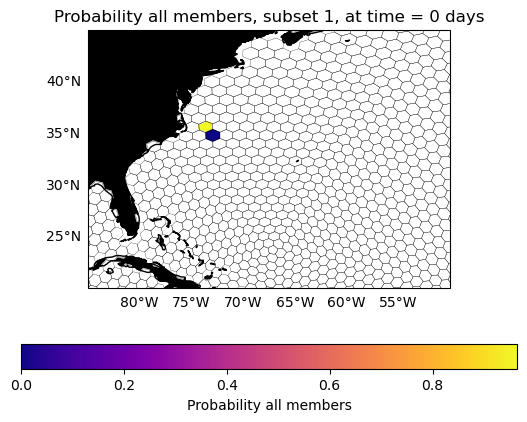

In [11]:

# Plot NA_domain on a map
depth = 0
fig = plt.figure()
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.set_extent([-85, -50, 20, 45], crs=cartopy.crs.PlateCarree())
ax.coastlines()

ax.add_feature(cartopy.feature.LAND, zorder=0, color='black')
gl = ax.gridlines(draw_labels=True, zorder=0, linestyle='--', linewidth=0.5, alpha=0.)
gl.top_labels = False
gl.right_labels = False


t = 0
t_gap = 0

im = hexbin_grid.pcolorhex(P_m['probability'][:, t].values, ax=ax, cmap='plasma', draw_edges=True)
ax.set_title(f'Probability all members, subset {1}, at time = {t} days')


cbar = plt.colorbar(im, ax=ax, orientation='horizontal', label=f'Probability all members')
